In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

# First we load the images and its targets

In [3]:
df = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

# Then we describe out dataset

In [4]:
print("There are {} images in the dataset".format(len(df)))
print("There are {} unique targets in the dataset".format(len(np.unique(target))))
print("Size of each input is {}x{}".format(df.shape[1], df.shape[2]))
print("Pixle values were scaled to [0,1] interval. e.g:{}".format(df[0][0,:4]))

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each input is 64x64
Pixle values were scaled to [0,1] interval. e.g:[0.30991736 0.3677686  0.41735536 0.44214877]


In [5]:
print("unique target number:", np.unique(target))

unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [6]:
def show_40_distinct_people(images, unique_ids):
  fig, axarr = plt.subplots(nrows=4, ncols=10, figsize = (18,9))
  axarr = axarr.flatten()

  for unique_id in unique_ids:
    image_index = unique_id*10
    axarr[unique_id].imshow(images[image_index], cmap='gray')
    axarr[unique_id].set_xticks([])
    axarr[unique_id].set_yticks([])
    axarr[unique_id].set_title("face id:{}".format(unique_id))
  plt.suptitle("There are 40 distinct people in the dataset")

# Next we are gonna look at 40 distinct people-facial images

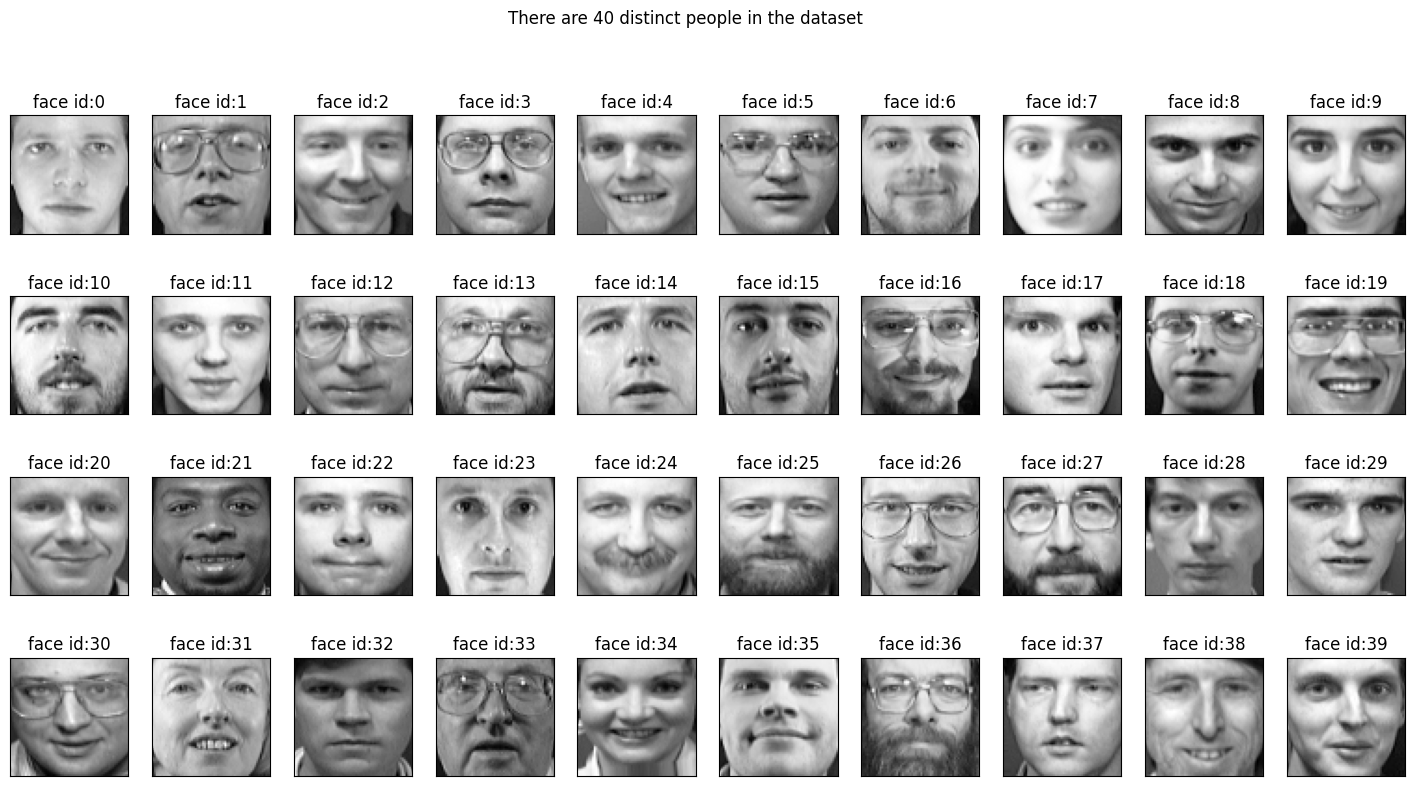

In [ ]:
show_40_distinct_people(df, np.unique(target))

In [7]:
def show_10_faces_of_n_subject(images, subject_ids):
  cols=10
  rows=(len(subject_ids)*10)/cols
  rows=int(rows)

  fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(18,9))

  for i, subject_id in enumerate(subject_ids):
    for j in range(cols):
      image_index = subject_id*10 + j
      axarr[i,j].imshow(images[image_index], cmap='gray')
      axarr[i,j].set_xticks([])
      axarr[i,j].set_yticks([])
      axarr[i,j].set_title("face id:{}".format(subject_id))

# Then we are gonna look at 10 face images of selected target
* We see that each face has its own characteristic features, e.g. glasses and hairs

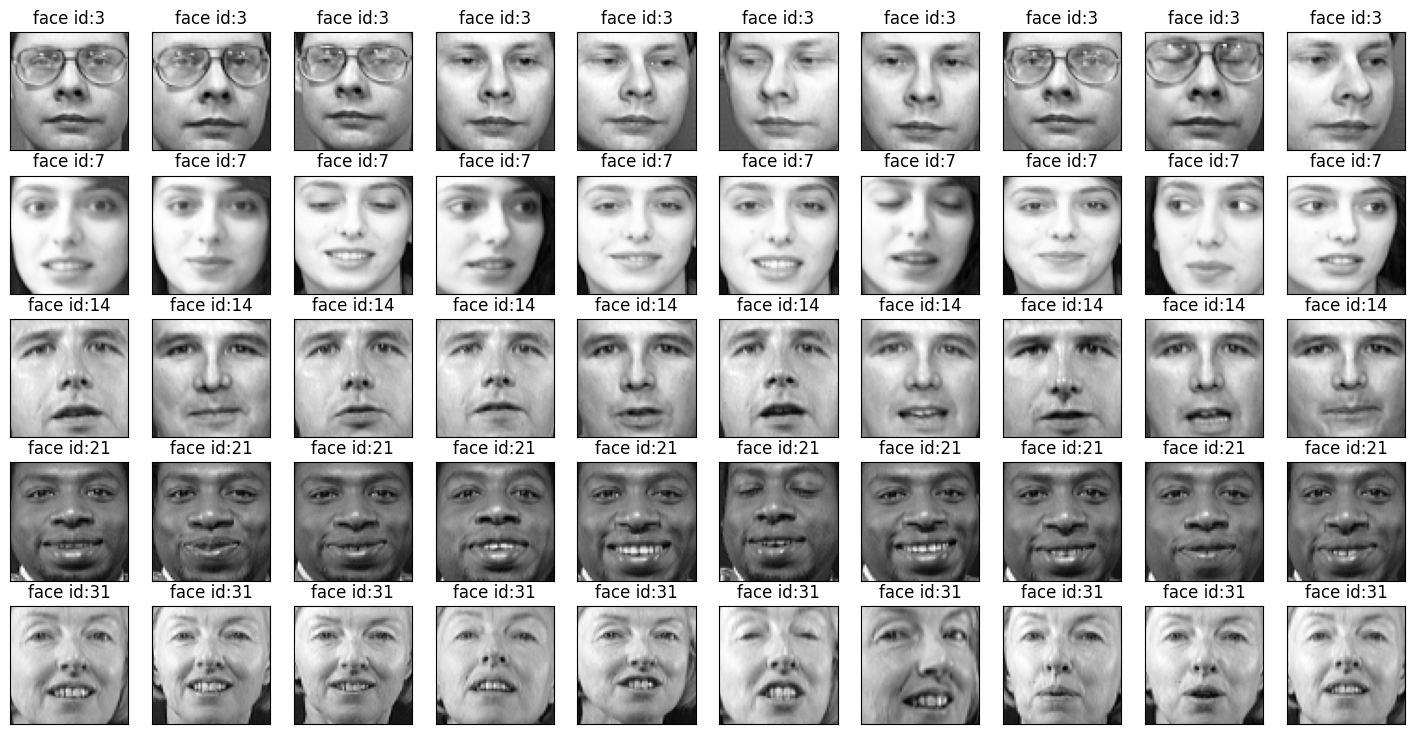

In [ ]:
show_10_faces_of_n_subject(images=df, subject_ids=[3,7,14,21,31])

# Next we are gonna prepare our data for couple models
* First we are gonna reshape our images

In [8]:
X = df.reshape((df.shape[0], df.shape[1]*df.shape[2]))
print("X shape:", X.shape)

X shape: (400, 4096)


# Then we split our data

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, stratify=target, random_state=0)
print("X_train shape:", X_train.shape)
print("y_train shape:{}".format(y_train.shape))

X_train shape: (280, 4096)
y_train shape:(280,)


# We can see that we have class balance

<Axes: title={'center': 'Number of samples for each classes'}, xlabel='subject_ids'>

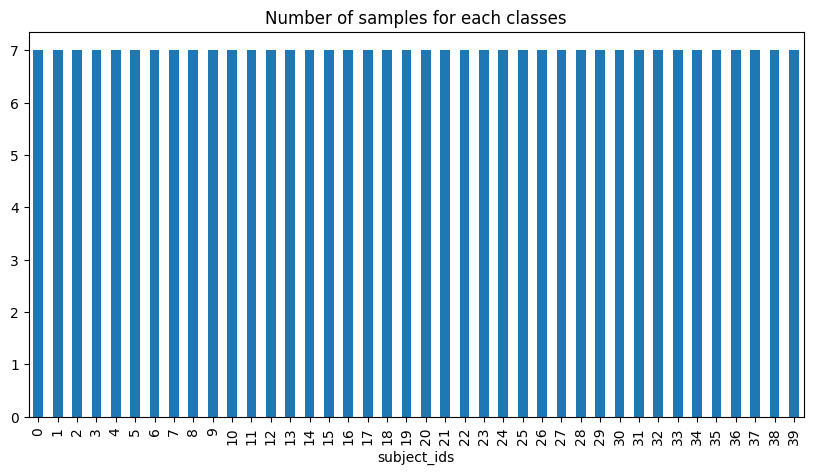

In [10]:
y_frame = pd.DataFrame()
y_frame['subject_ids'] = y_train
y_frame.groupby(['subject_ids']).size().plot.bar(figsize=(10,5), title="Number of samples for each classes")

# Now its time for dimensionality reduction PCA

In [ ]:
!pip install mglearn
import mglearn

# At the graph shown below if we have 2 components data we can transform it
# Next left only 1 component and make back-rotation with only this component

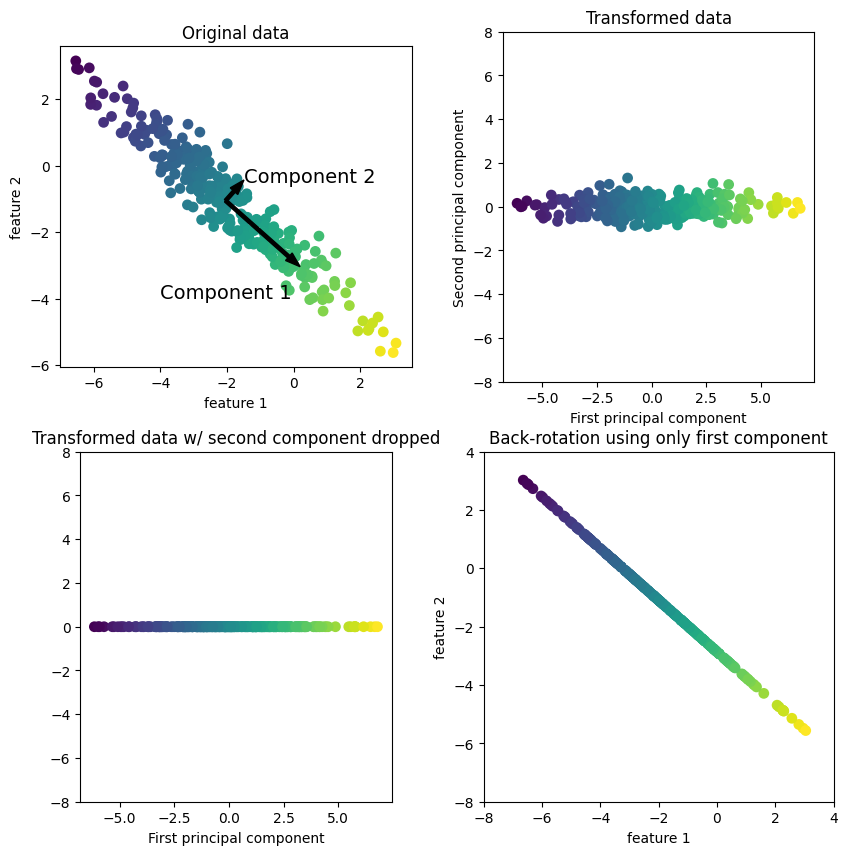

In [ ]:
mglearn.plots.plot_pca_illustration()

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# We are gonna left only 2 components of our data

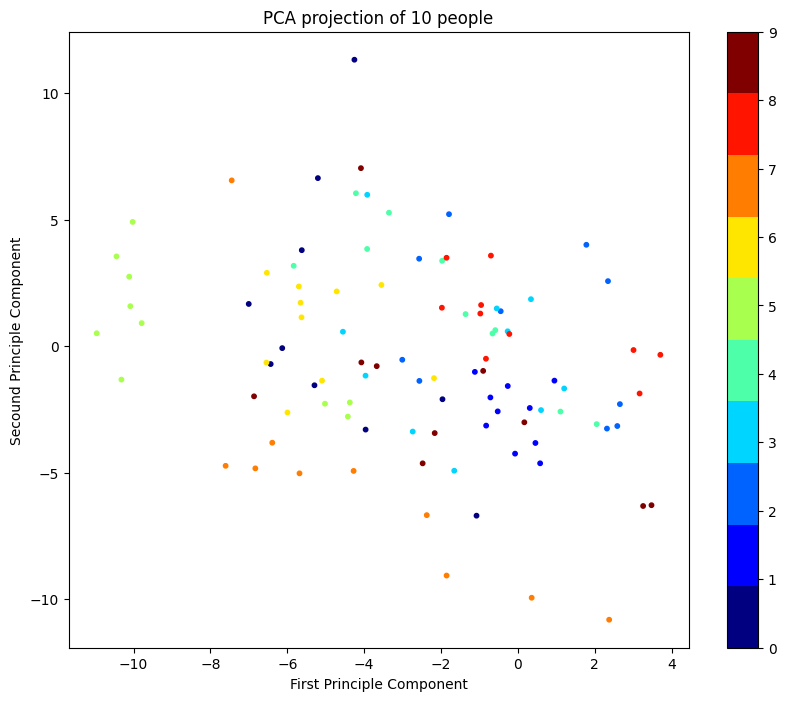

In [12]:
number_of_people=10
index_range = number_of_people*10
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(X_pca[:index_range,0],
                     X_pca[:index_range,1],
                     c = target[:index_range],
                     s=10,
                     cmap = plt.get_cmap('jet', number_of_people)
                     )

ax.set_xlabel("First Principle Component")
ax.set_ylabel("Secound Principle Component")
ax.set_title("PCA projection of {} people".format(number_of_people))

fig.colorbar(scatter)

# The KElbow method don't give me any concreate results
* In that case i think better method will be explain_variance_

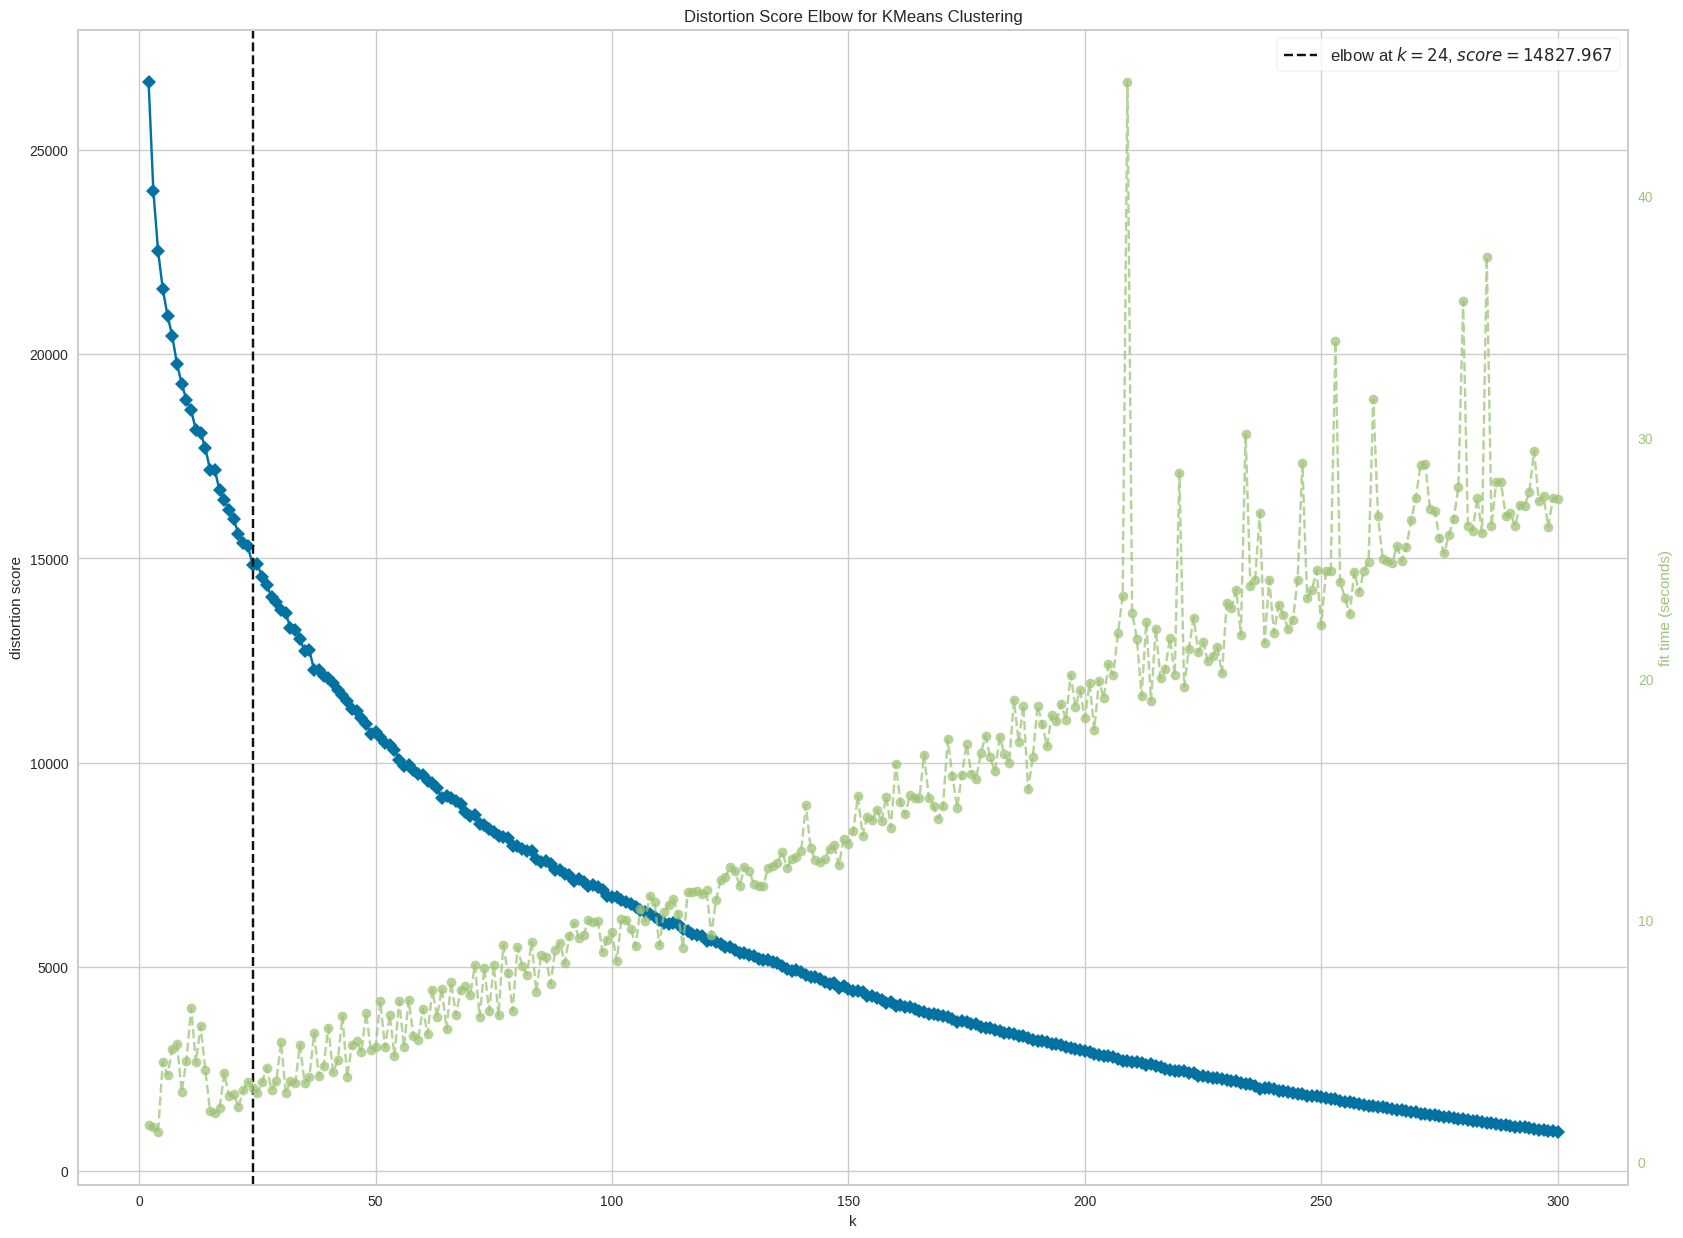

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), n_init='auto', k = 300, size=(2000, 1500))
Elbow_M.fit(X)
Elbow_M.show()

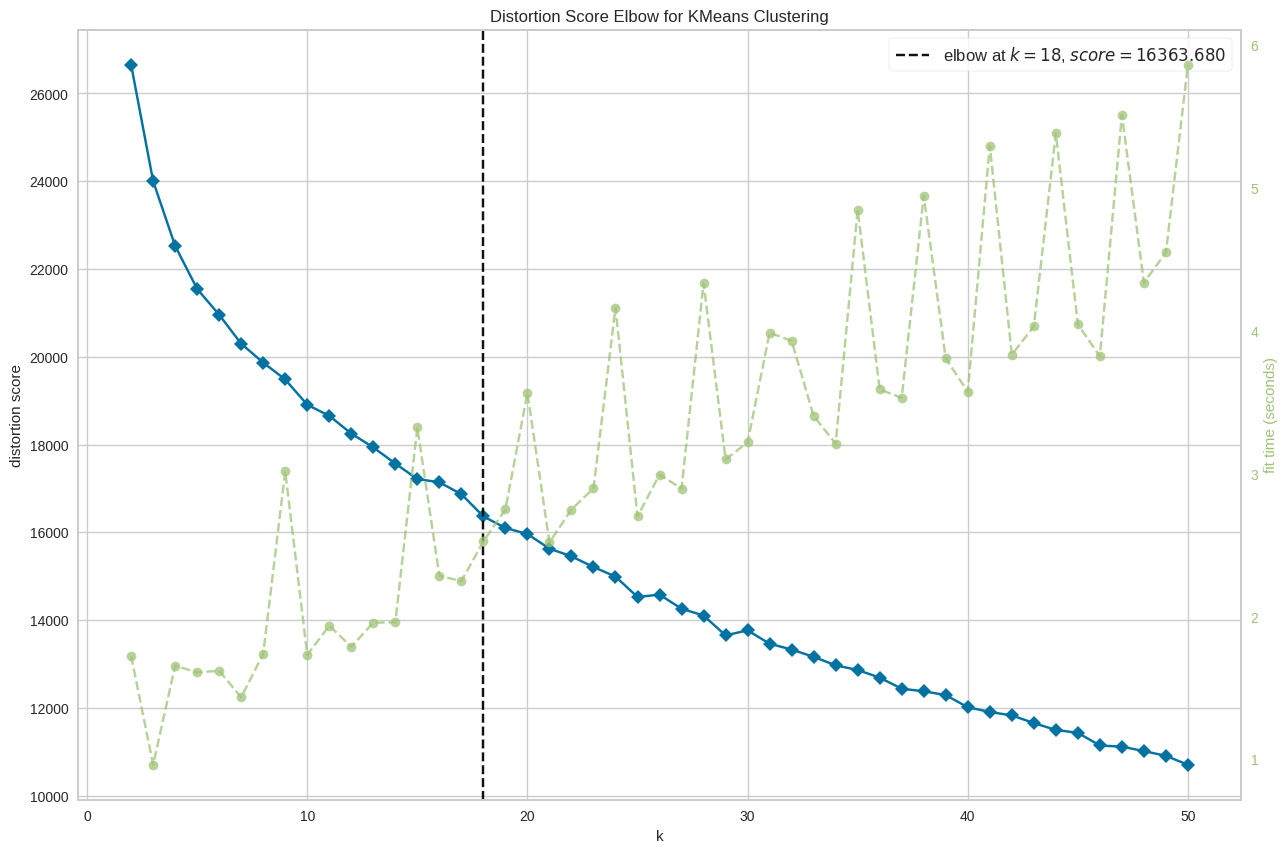

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [13]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

Elbow_M = KElbowVisualizer(KMeans(), n_init='auto', k = 50, size=(1500, 1000))
Elbow_M.fit(X)
Elbow_M.show()

# Now we are gonna check what is the optimal number of components
* Then i check explained_variance_ and i can see that the best num. of components are around 50 and 90

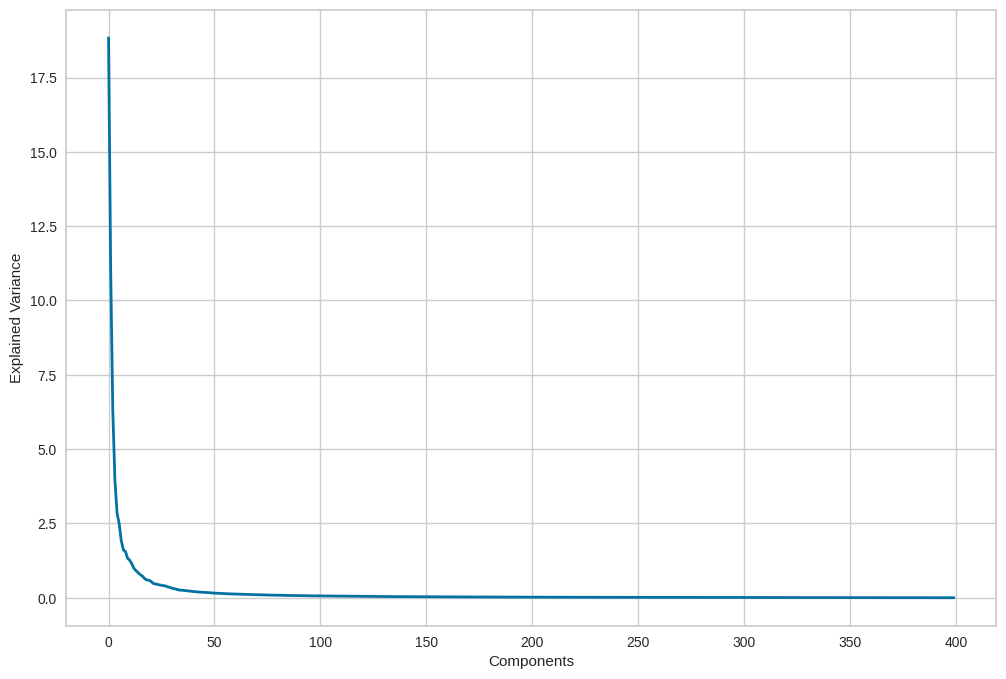

In [ ]:
pca = PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)

plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

In [ ]:
n_components=90

pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train)

PCA(n_components=90, whiten=True)

# Now when we have our PCA trained we are gonna look at average face

Text(0.5, 1.0, 'Average face')

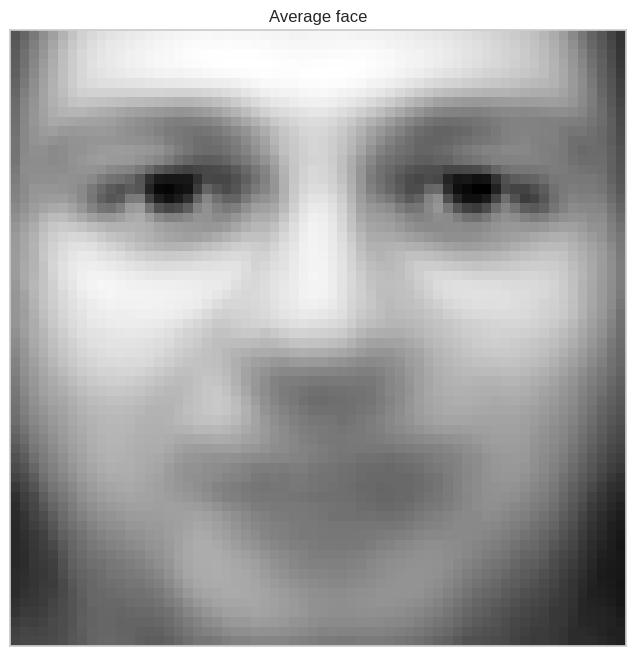

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.imshow(pca.mean_.reshape((64,64)), cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average face')

Text(0.5, 0.98, 'All Eigen Faces')

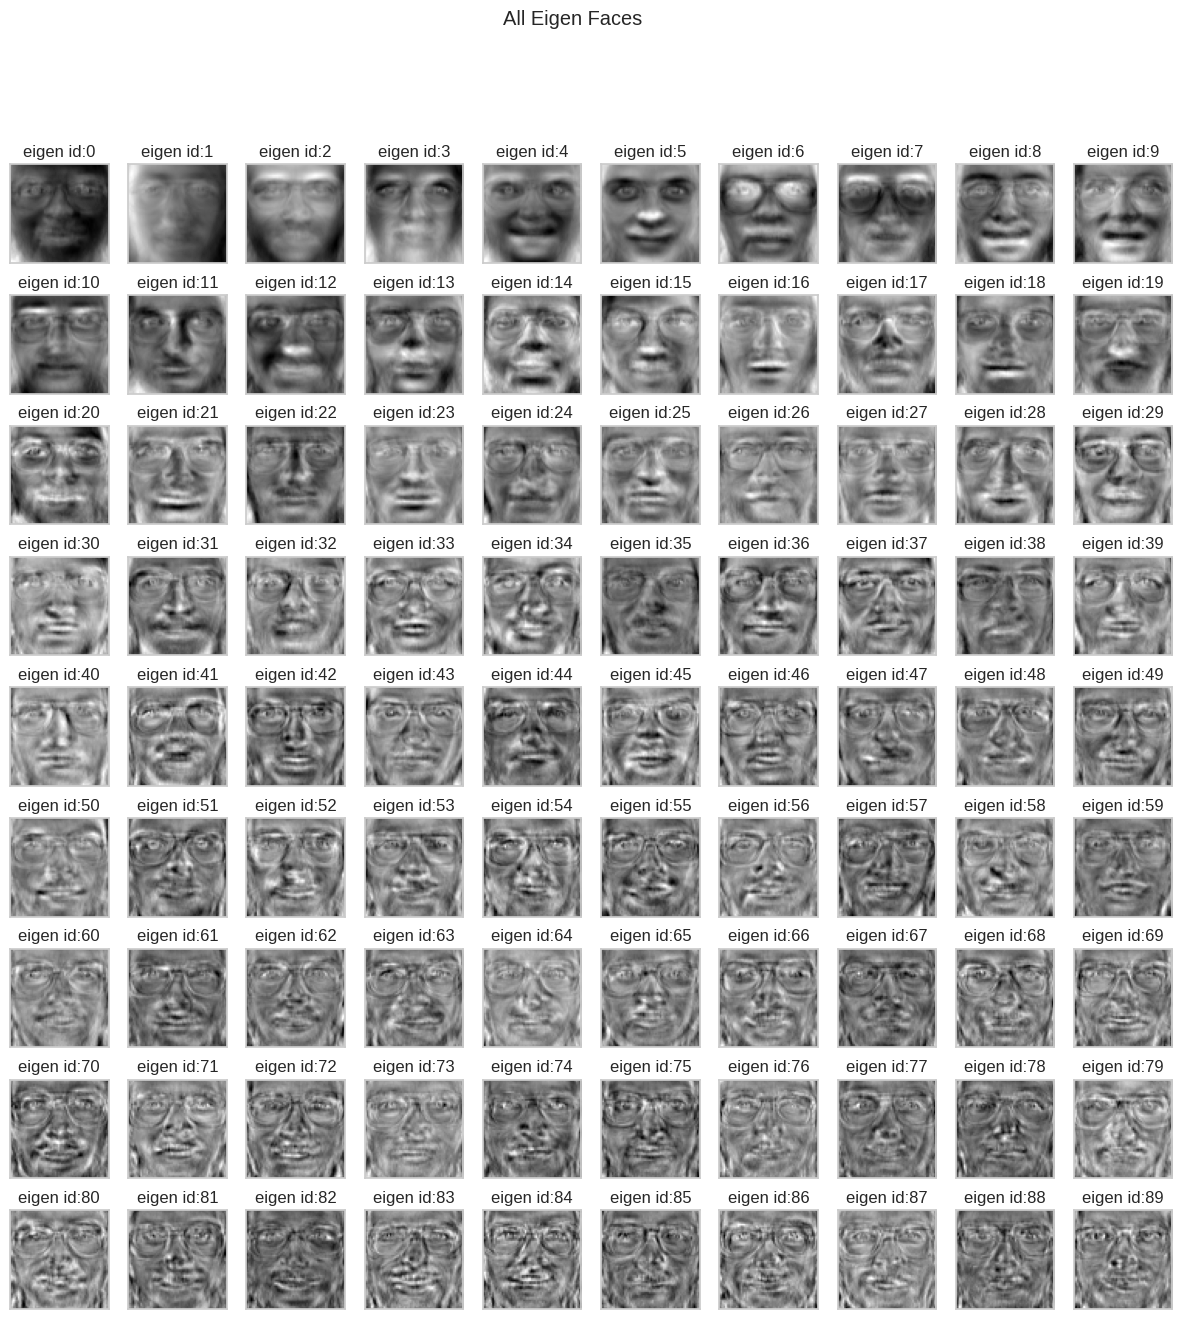

In [ ]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, df.shape[1], df.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr = axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))

# Now its time for classification
* First i change the format

In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# I can see that if i increase number of components i reach higher accuracy
# And i reach the best accuracy with components from 50 to 90

In [ ]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)
print("accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

accuracy score:0.92


<Axes: >

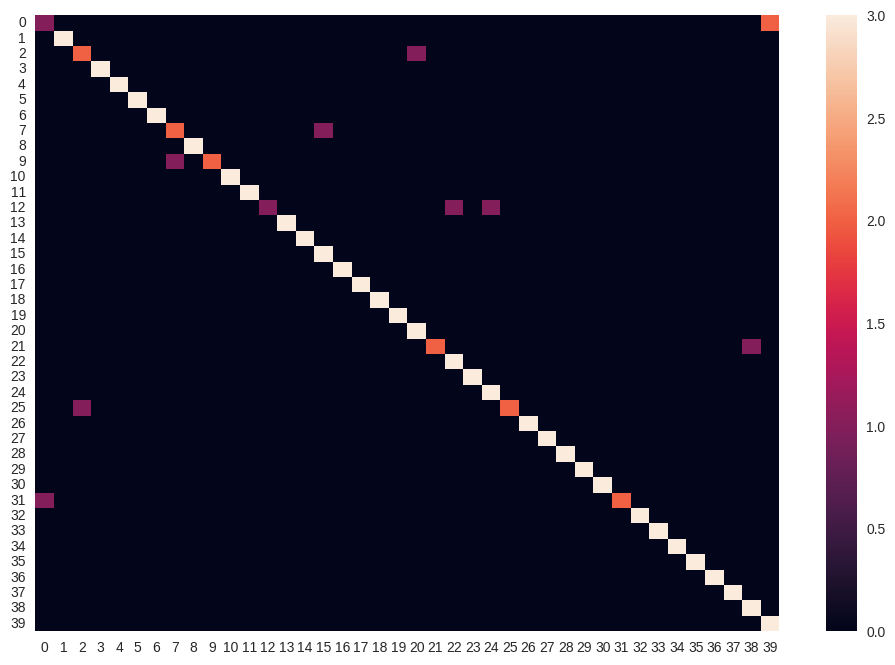

In [ ]:
import seaborn as sn
plt.figure(1, figsize=(12,8))
sn.heatmap(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.33      0.40         3
           1       1.00      1.00      1.00         3
           2       0.67      0.67      0.67         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       0.67      0.67      0.67         3
           8       1.00      1.00      1.00         3
           9       1.00      0.67      0.80         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       0.75      1.00      0.86         3
          16       1.00      1.00      1.00         3
          17       1.00    

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [ ]:
models = []
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

for name, model in models:

  clf=model

  clf.fit(X_train_pca, y_train)

  y_pred = clf.predict(X_test_pca)
  print(10*"=","{} Result".format(name).upper(),10*"=")
  print("Accuracy score:{:0.2f}".format(metrics.accuracy_score(y_test, y_pred)))
  print()

========== LDA RESULT ==========
Accuracy score:0.94

========== LR RESULT ==========
Accuracy score:0.93

========== NB RESULT ==========
Accuracy score:0.88

========== KNN RESULT ==========
Accuracy score:0.81

========== DT RESULT ==========
Accuracy score:0.61

========== SVM RESULT ==========
Accuracy score:0.92



# Then i gonna check couple combinations of the training batches and take the average score
* And after some more samples of data on which i train my models
* I can see that there is actually the difference between LDA and LR
* SVM is also little below

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

pca = PCA(n_components=n_components, whiten=True)
pca.fit(X)
X_pca = pca.transform(X)

for name, model in models:
  kfold = KFold(n_splits=5, shuffle=True, random_state=0)

  cv_scores = cross_val_score(model, X_pca, target, cv=kfold)
  print("{} Mean cross validation score:{:.2f}".format(name, cv_scores.mean()))

LDA Mean cross validation score:0.98
LR Mean cross validation score:0.96
NB Mean cross validation score:0.82
KNN Mean cross validation score:0.83
DT Mean cross validation score:0.51
SVM Mean cross validation score:0.93


# So i gonna use LinearDiscriminantAnalysis model

In [ ]:
lr = LinearDiscriminantAnalysis()
lr.fit(X_train_pca, y_train)
y_pred = lr.predict(X_test_pca)
print("Accuracy score:{:.2f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy score:0.94


<Axes: >

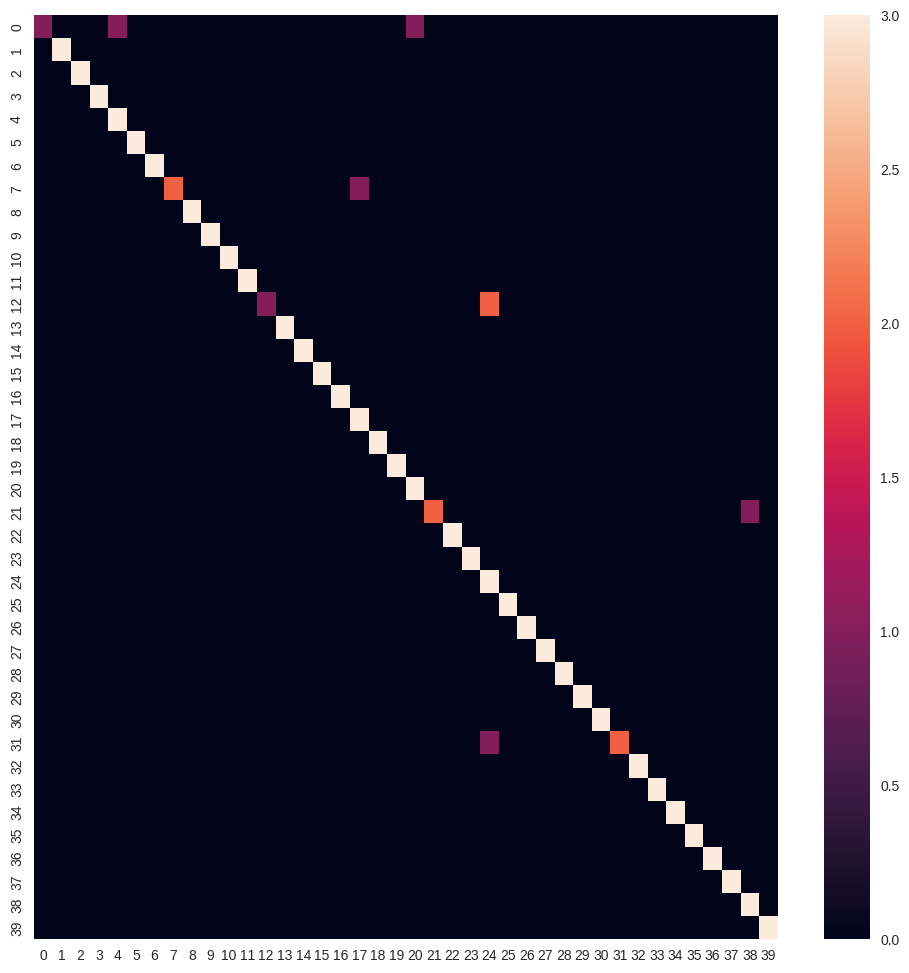

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred)

plt.subplots(1, figsize=(12,12))
sn.heatmap(cm)

In [ ]:
print("Classification Results:\n{}".format(metrics.classification_report(y_test, y_pred)))

Classification Results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.75      1.00      0.86         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.33      0.50         3
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00      1.00         3
   

# Are continue our evaluations using LeaveOneOut model
* It use only one sample of a class for testing, others are left for training

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo_cv = LeaveOneOut()
clf = LogisticRegression()
cv_scores = cross_val_score(clf,
                            X_pca,
                            target,
                            cv=loo_cv)
print("{} Leave one out cross_valid LogisticRegression mean accuracy score:{:.2f}".format(clf.__class__.__name__, cv_scores.mean()))

LogisticRegression Leave one out cross_valid LogisticRegression mean accuracy score:0.97


# And also in this method higher score achieve LinearDiscriminantAnalysis model

In [ ]:
clf = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(clf,
                            X_pca,
                            target,
                            cv=loo_cv)
print("{} Leave one out cross_valid LinearDiscriminantAnalysis mean accuracy score:{:.2f}".format(clf.__class__.__name__, cv_scores.mean()))

LinearDiscriminantAnalysis Leave one out cross_valid LinearDiscriminantAnalysis mean accuracy score:0.99


# Next we want to illustrate precision and recall curves
* But first we are gonna prepare our dataset

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

Target = label_binarize(target, classes=range(40))
print(Target.shape)
print(Target[0])

n_classes = Target.shape[1]

(400, 40)
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


In [ ]:
X_train_multiclass, X_test_multiclass, y_train_multiclass, y_test_multiclass = train_test_split(X,
                                                                                                Target,
                                                                                                test_size=0.3,
                                                                                                stratify=Target,
                                                                                                random_state=0)

In [ ]:
pca = PCA(n_components=n_components, whiten=True)
pca.fit(X_train_multiclass)

X_train_multiclass_pca = pca.transform(X_train_multiclass)
X_test_multiclass_pca = pca.transform(X_test_multiclass)

In [ ]:
oneRestClassifier = OneVsRestClassifier(lr)

oneRestClassifier.fit(X_train_multiclass_pca, y_train_multiclass)
y_score = oneRestClassifier.decision_function(X_test_multiclass_pca)

In [ ]:
precision = dict()
recall = dict()
average_precision = dict()

for i in range(n_classes):
    precision[i], recall[i], _ = metrics.precision_recall_curve(y_test_multiclass[:, i],y_score[:, i])
    average_precision[i] = metrics.average_precision_score(y_test_multiclass[:, i], y_score[:, i])

precision["micro"], recall["micro"], _ = metrics.precision_recall_curve(y_test_multiclass.ravel(),y_score.ravel())
average_precision["micro"] = metrics.average_precision_score(y_test_multiclass, y_score, average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'.format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.95


In [ ]:
pip install funcsigs

Text(0.5, 1.0, 'Average precision score, micro-averaged over all classes: AP=0.95')

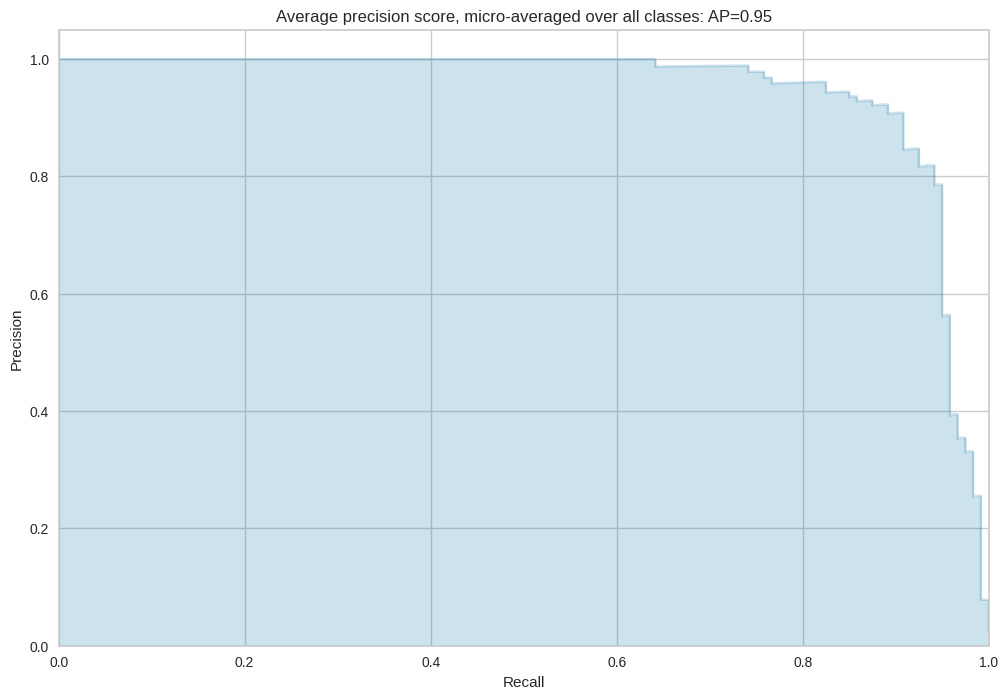

In [ ]:
from funcsigs import signature

step_kwargs = ({'step', 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize=(12,8))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2, where='post')
plt.fill_between(recall['micro'], precision['micro'], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Average precision score, micro-averaged over all classes: AP={0:0.2f}'.format(average_precision['micro']))

# Next we are gonna perform our model in automated workflow: Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

work_flows_std = list()
work_flows_std.append(('lda', LinearDiscriminantAnalysis()))
work_flows_std.append(('logReg', LogisticRegression(C=1.0, penalty='l2')))

model_std = Pipeline(work_flows_std)
model_std.fit(X_train, y_train)
y_pred = model_std.predict(X_test)

In [ ]:
print('Accuracy score:{:.2f}'.format(metrics.accuracy_score(y_test, y_pred)))
print('Classification results:\n{}'.format(metrics.classification_report(y_test, y_pred)))

Accuracy score:0.95
Classification results:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       1.00      1.00      1.00         3
           2       0.60      1.00      0.75         3
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         3
           7       1.00      0.67      0.80         3
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         3
          11       1.00      1.00      1.00         3
          12       1.00      0.67      0.80         3
          13       1.00      1.00      1.00         3
          14       0.75      1.00      0.86         3
          15       1.00      1.00      1.00         3
          16       1.00      1.00    